In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import stats

plt.style.use("seaborn-v0_8")

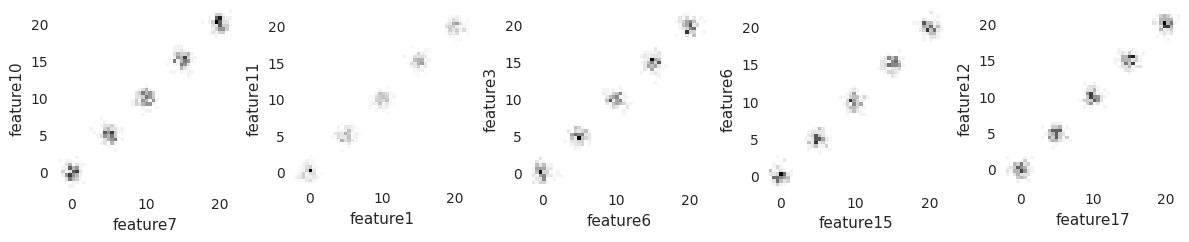

In [2]:
dim = 20
n_samples = 500
sigma = 0.5 * np.identity(dim)

data = stats.multivariate_normal.rvs(mean=np.zeros((dim)), cov=sigma, size=100)
for i in range(1, 5):
    mu = 5 * i * np.ones((dim))
    data = np.r_[
        data, stats.multivariate_normal.rvs(mean=mu, cov=sigma, size=n_samples // 5)
    ]

df = pd.DataFrame(data=data, columns=[f"feature{i+1}" for i in range(20)])
df = df.sample(frac=1, ignore_index=True)

fig, axs = plt.subplots(1, 5, figsize=(12, 3))

for ax in axs:
    feat1, feat2 = 0, 0
    while feat1 == feat2:
        feat1, feat2 = np.random.randint(low=0, high=20, size=2)
    ax.hist2d(df.iloc[:, feat1], df.iloc[:, feat2], bins=50)
    ax.set_xlabel(f"feature{feat1 + 1}")
    ax.set_ylabel(f"feature{feat2 + 1}")
    ax.axis("scaled")
    ax.grid(True)

fig.tight_layout()
plt.show()

In [3]:
print(df.shape)
df_norm = (df - df.min()) / (df.max() - df.min())

df_norm.head()
df_norm.round(decimals=4).to_csv("datasets/multivariate_normal_dim20.csv", index=False)

(500, 20)
